In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

dataX = pd.read_fwf('uWaveGestureLibrary_X_TRAIN_tx.txt',header=None)
dataY = pd.read_fwf('uWaveGestureLibrary_Y_TRAIN_tx.txt',header=None)
dataZ = pd.read_fwf('uWaveGestureLibrary_Z_TRAIN_tx.txt',header=None)

Acceleration informations are read.

In [10]:
classes=dataX.iloc[:,0]
dataX=dataX.iloc[:,1:]
dataY=dataY.iloc[:,1:]
dataZ=dataZ.iloc[:,1:]

Then, I removed class information from the each axis data to be able to compute the distance between the time series for each axis in further steps. 

In [11]:
distX=pd.DataFrame(euclidean_distances(dataX,dataX))
distY=pd.DataFrame(euclidean_distances(dataY,dataY))
distZ=pd.DataFrame(euclidean_distances(dataZ,dataZ))
dist_matrix=(distX.values+distY.values+distZ)

I calculated distances over each axis and summed them up to obtain a final distance
measure.

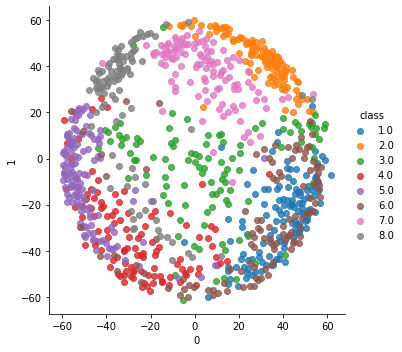

In [12]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = pd.DataFrame(model.fit_transform(dist_matrix))
out= pd.concat([classes, out], axis=1, sort=False)
out.columns=['class','0','1']
sns.lmplot( x='0', y='1', data=out, fit_reg=False, hue='class', legend='full')


I applied multidimensional scaling to this distance matrix to represent each time series on a 2-dimensional
feature space. I can conclude that we can not separate class 1 and 6 very well. Also, although the green one representing class 3 has a specific area, it can occur in other classes as well. However, this graph is a good way to understand closeness in classes.For example lets focus on green pink and orange. They represents class 3, 7 and 2, respectively. One can expect that class 7 have informations not only from class 3 but also from class 2 since it is located between class 3 and 2. When this inside is checked by looking at the gesture shapes, we can say that this intuition seems like true. 